In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from fastprogress.fastprogress import master_bar, progress_bar

In [2]:
input_paths = [f'/run/media/wasserstoff/Fedora Linux New/torrent/light/{i}.csv' for i in range(14)]
input_paths

['/run/media/wasserstoff/Fedora Linux New/torrent/light/0.csv',
 '/run/media/wasserstoff/Fedora Linux New/torrent/light/1.csv',
 '/run/media/wasserstoff/Fedora Linux New/torrent/light/2.csv',
 '/run/media/wasserstoff/Fedora Linux New/torrent/light/3.csv',
 '/run/media/wasserstoff/Fedora Linux New/torrent/light/4.csv',
 '/run/media/wasserstoff/Fedora Linux New/torrent/light/5.csv',
 '/run/media/wasserstoff/Fedora Linux New/torrent/light/6.csv',
 '/run/media/wasserstoff/Fedora Linux New/torrent/light/7.csv',
 '/run/media/wasserstoff/Fedora Linux New/torrent/light/8.csv',
 '/run/media/wasserstoff/Fedora Linux New/torrent/light/9.csv',
 '/run/media/wasserstoff/Fedora Linux New/torrent/light/10.csv',
 '/run/media/wasserstoff/Fedora Linux New/torrent/light/11.csv',
 '/run/media/wasserstoff/Fedora Linux New/torrent/light/12.csv',
 '/run/media/wasserstoff/Fedora Linux New/torrent/light/13.csv']

In [3]:
data: pd.DataFrame = pd.read_csv(input_paths[0], usecols=["is_referenced_by_count" ,"reference_count", "published", "author_count"])
for path in progress_bar(input_paths[1:]):
    data = pd.concat([data, pd.read_csv(path, usecols=["is_referenced_by_count" ,"reference_count", "published", "author_count"])], ignore_index=True, sort=False)

In [4]:
data.head()

is_referenced_by_count  reference_count  published  author_count
0                      40               76       2002             3
1                       7               46       2002             6
2                     271               37       1996             2
3                      18               33       2001             1
4                     123                0       1999             5

<Axes: >

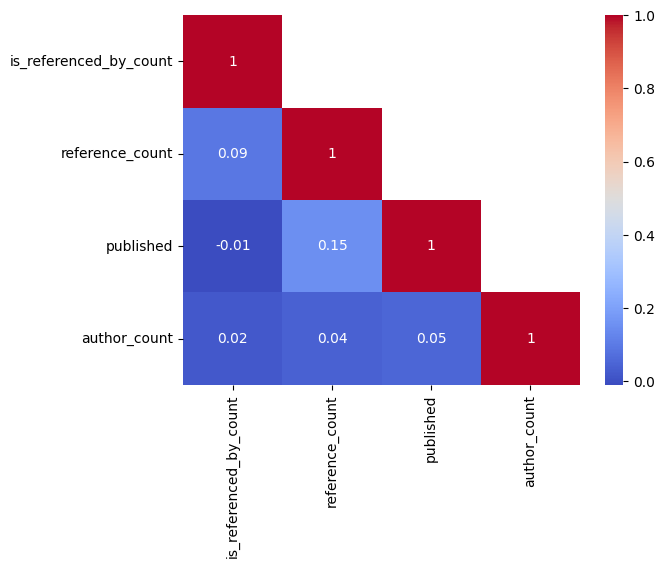

In [7]:
# From Lecture:
correlation_matrix = data.corr().round(2)

# print heatmap of the correlation matrix
# next two lines remove the duplicate upper half of matrix
mask = np.zeros(correlation_matrix.shape, dtype=bool)
mask[np.triu_indices(len(mask),1)] = True

sns.heatmap(data=correlation_matrix, annot=True, cmap = "coolwarm", mask=mask)